In [17]:
import matplotlib.pyplot as plt
import erlab.plotting.erplot as eplt

In [18]:
%config InlineBackend.figure_formats = ["svg", "pdf"]
plt.rcParams["figure.dpi"] = 96
import xarray as xr
xr.set_options(display_expand_data=False)

First, let us generate some example data from a simple tight binding model of graphene.

In [19]:
from erlab.interactive.exampledata import generate_data

dat = generate_data()

In [20]:
dat

<xarray.DataArray (kx: 250, ky: 250, eV: 300)> Size: 150MB
2.043e+03 2.018e+03 2.007e+03 2.045e+03 ... 7.449e-05 0.004677 0.01876 0.004749
Coordinates:
  * kx       (kx) float64 2kB -0.89 -0.8829 -0.8757 ... 0.8757 0.8829 0.89
  * ky       (ky) float64 2kB -0.89 -0.8829 -0.8757 ... 0.8757 0.8829 0.89
  * eV       (eV) float64 2kB -0.45 -0.4482 -0.4464 ... 0.08639 0.08819 0.09

In [21]:
cut = dat.sel(ky=0.3, method="nearest")
cut

<xarray.DataArray (kx: 250, eV: 300)> Size: 600kB
1.227e+03 1.223e+03 1.21e+03 1.212e+03 ... 0.02343 0.02343 0.004749 7.265e-05
Coordinates:
  * kx       (kx) float64 2kB -0.89 -0.8829 -0.8757 ... 0.8757 0.8829 0.89
    ky       float64 8B 0.2967
  * eV       (eV) float64 2kB -0.45 -0.4482 -0.4464 ... 0.08639 0.08819 0.09

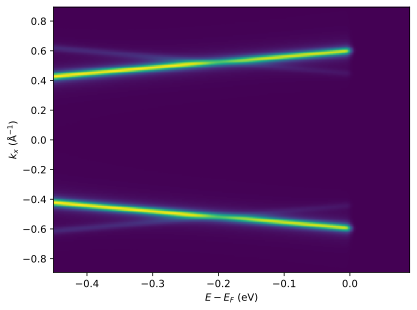

In [22]:
eplt.plot_array(cut)

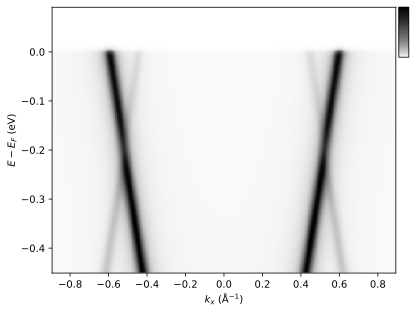

In [23]:
eplt.plot_array(
    cut.T, cmap="Greys", gamma=0.5, colorbar=True, colorbar_kw=dict(width=10, ticks=[])
)

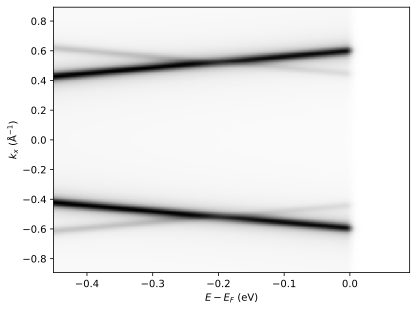

In [24]:
cut.qplot(cmap="Greys", gamma=0.5)

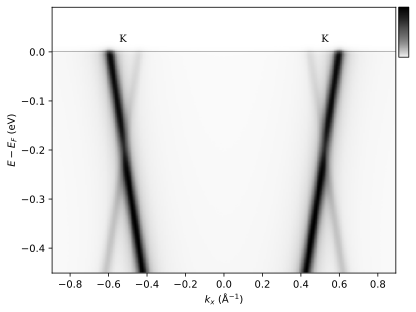

In [25]:
eplt.plot_array(cut.T, cmap="Greys", gamma=0.5)

eplt.fermiline()
eplt.mark_points([-0.525, 0.525], ["K", "K"], fontsize=10, pad=(0, 10))
eplt.nice_colorbar(width=10, ticks=[])

What if we want to plot multiple slices at once? We should create subplots to place the slices. *plt.subplots* is very useful in managing multiple axes and figures. If you are unfamiliar with the syntax, visit the [relevant matplotlib documentation](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html).

Suppose we want to plot constant energy surfaces at specific binding energies, say, at `[-0.4, -0.2, 0.0]`. We could create three subplots and iterate over the list, plotting each slice on each subplot. We would also want to label each plot with their binding energy. 

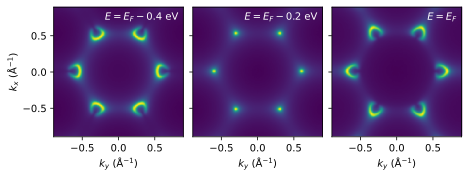

In [26]:
energies = [-0.4, -0.2, 0.0]

fig, axs = plt.subplots(1, 3, layout="compressed", sharey=True)

for energy, ax in zip(energies, axs):
    const_energy_surface = dat.sel(eV=energy, method="nearest")
    eplt.plot_array(const_energy_surface, ax=ax, gamma=0.5, aspect="equal")

eplt.clean_labels(axs)  # removes shared y labels
eplt.label_subplot_properties(axs, values=dict(Eb=energies))  # annotates energy

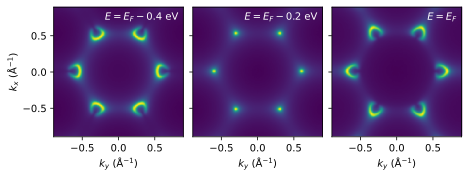

In [27]:
fig, axs = eplt.plot_slices([dat], eV=[-0.4, -0.2, 0.0], gamma=0.5, axis="image")

Cuts along constant $k_y$ can be plotted analogously.

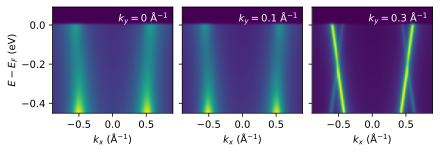

In [28]:
fig, axs = eplt.plot_slices(
    [dat], transpose=True, ky=[0.0, 0.1, 0.3], gamma=0.5, figsize=(6, 2)
)

Here, we notice that the first two plots slices through regions with less spectral weight, so the color across the three subplots are not on the same scale. This may be misleading in some occasions where intensity across different slices are important. Luckily, we have a function that can unify the color limits across multiple axes. The same effect can be achieved by passing on `same_limits=True` to `plot_slices`.

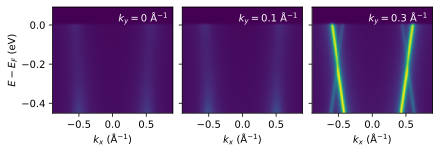

In [29]:
fig, axs = eplt.plot_slices(
    [dat], transpose=True, ky=[0.0, 0.1, 0.3], gamma=0.5, figsize=(6, 2)
)
eplt.unify_clim(axs)

We can also choose a reference axis to get the color limits from.

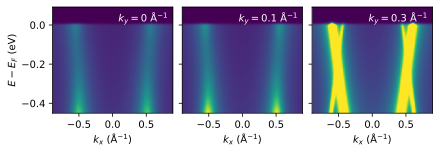

In [30]:
fig, axs = eplt.plot_slices(
    [dat], transpose=True, ky=[0.0, 0.1, 0.3], gamma=0.5, figsize=(6, 2)
)
eplt.unify_clim(axs, target=axs[0, 1])

What if we want to plot constant energy surfaces and cuts in the same figure? We can create the subplots first and then utilize the `axes` argument of `plot_slices`.

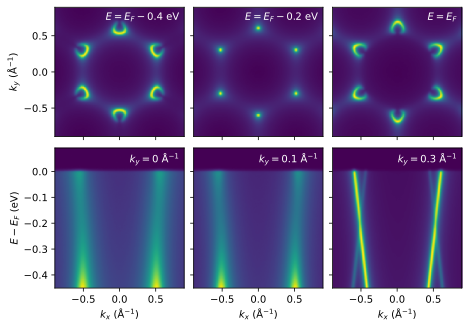

In [31]:
fig, axs = plt.subplots(2, 3, layout="compressed", sharex=True, sharey="row")
eplt.plot_slices([dat.T], eV=[-0.4, -0.2, 0.0], gamma=0.5, axes=axs[0, :], axis="image")
eplt.plot_slices([dat.T], ky=[0.0, 0.1, 0.3], gamma=0.5, axes=axs[1, :])
eplt.clean_labels(axs)

You can control the look and feel of matplotlib figures with [*style sheets* and *rcParams*](https://matplotlib.org/stable/users/explain/customizing.html). In addition to the [options provided by matplotlib](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html), ERLabPy provides some style sheets that are listed below. Note that style sheets that change the default font requires the font to be installed on the system. To see how each one looks, try running [the code provided by matplotlib](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

| Style Name | Description                                                                                         |
|------------|-----------------------------------------------------------------------------------------------------|
| khan       | Personal preferences.                                                                               |
| fira       | Changes the default font to Fira Sans.                                                              |
| firalight  | Changes the default font to Fira Sans Light.                                                        |
| times      | Changes the default font to Times New Roman.                                                        |
| nature     | Changes the default font to Arial, and tweaks some aspects such as padding and default figure size. |


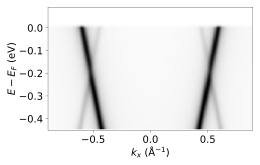

In [32]:
with plt.style.context(["nature"]):
    eplt.plot_array(cut.T, cmap="Greys", gamma=0.5)